# Radar Analysis
*BeamNG.tech only*

## Introduction

This example will demonstrate how to use the RADAR sensor to perform some simple readings from a moving vehicle.

## Scenario 

Our scenario contains an AI-driven vehicle eqipped with a RADAR sensor, which will drive on the West Coast USA map, and take occassional readings from its RADAR sensor.  

## Setup

Setting up the environment starts with importing the required classes, mainly:

* `BeamNGpy`: The backbone of the library used to manage BeamNG and communicate with the running simulation
* `Scenario`: A class representing the scenario we set up. It will contain information about which level to load and vehicles contained in the scenario.
* `Vehicle`: Each of our vehicles will be an instance of this class. It is used to represent and communicate with a vehicle in the simulation.
* `Radar`: The class implementing a RADAR sensor (the focus of this example).

Additionally, some modules and classes related to later plotting are imported.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from time import sleep
from beamngpy import BeamNGpy, Scenario, Vehicle
from beamngpy.sensors import Radar

sns.set()  # Let seaborn apply better styling to all matplotlib graphs

We proceed to set up the scenario and vehicle.

In [2]:
beamng = BeamNGpy('localhost', 64256)
beamng.open()

scenario = Scenario('west_coast_usa', 'driver_comfort')

vehicle = Vehicle('vehicle1', model='etk800', license='RADAR', color='Blue')

We add the vehicle to our scenario and start the scenario. The location at which the vehicle is placed was determined manually in the game's World Editor. The call to `scenario.make(beamng)` creates files necessary for the game to load our scenario during the simulation.

In [3]:
scenario.add_vehicle(vehicle, pos=(-767.1, 402.8, 142.8), rot_quat=(0, 0, 0.027, 1))

scenario.make(beamng)
beamng.scenario.load(scenario)
beamng.settings.set_deterministic()
beamng.settings.set_steps_per_second(60)
beamng.scenario.start()

Next, we create a RADAR sensor and associate it to the vehicle. This RADAR sensor is placed 1.7m directly above the vehicle and is set to face in the vehicle's forward direction. These geometric values are relative to the central node of the vehicle, rather than relative to the map itself (vehicle space, rather than world space).
Here, we also store some of the parameters we have used to set up the RADAR, such as the image resolution and RADAR range min/max.  This is done so we can recall them later when plotting the data.
Other parameters such as range_roundness, range_shape etc are used to shape the beam of the radar.  The values provided here are reasonable defaults.  For more information on how to shape the sensor beam, please refer to the BeamNG.tech documentation.

In [4]:
RANGE_MIN = 0.1
RANGE_MAX = 100.0
RESOLUTION = (200, 200)
FOV = 70
radar = Radar('radar1', beamng, vehicle,
    requested_update_time=0.01,
    pos=(0, 0, 1.7), dir=(0, -1, 0), up=(0, 0, 1),
    resolution=RESOLUTION, field_of_view_y=FOV, near_far_planes=(RANGE_MIN, RANGE_MAX),
    range_roundess=-2.0, range_cutoff_sensitivity=0.0, range_shape=0.23, range_focus=0.12, range_min_cutoff=0.5, range_direct_max_cutoff=RANGE_MAX)

## Running

After our scenario is loaded in the simulator, we start the scenario letting the vehicle drive around for five seconds.  At this point in time, the RADAR sensor is polled and the data is plotted.  This happens three times.

c:\beamngpy\src\beamngpy\sensors\radar.py:346: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh = ax[1, 0].pcolormesh(grid_x, grid_y, v_bins)
c:\beamngpy\src\beamngpy\sensors\radar.py:354: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh = ax[1, 1].pcolormesh(grid_x, grid_y, RCS_bins)
c:\beamngpy\src\beamngpy\sensors\radar.py:362: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
 

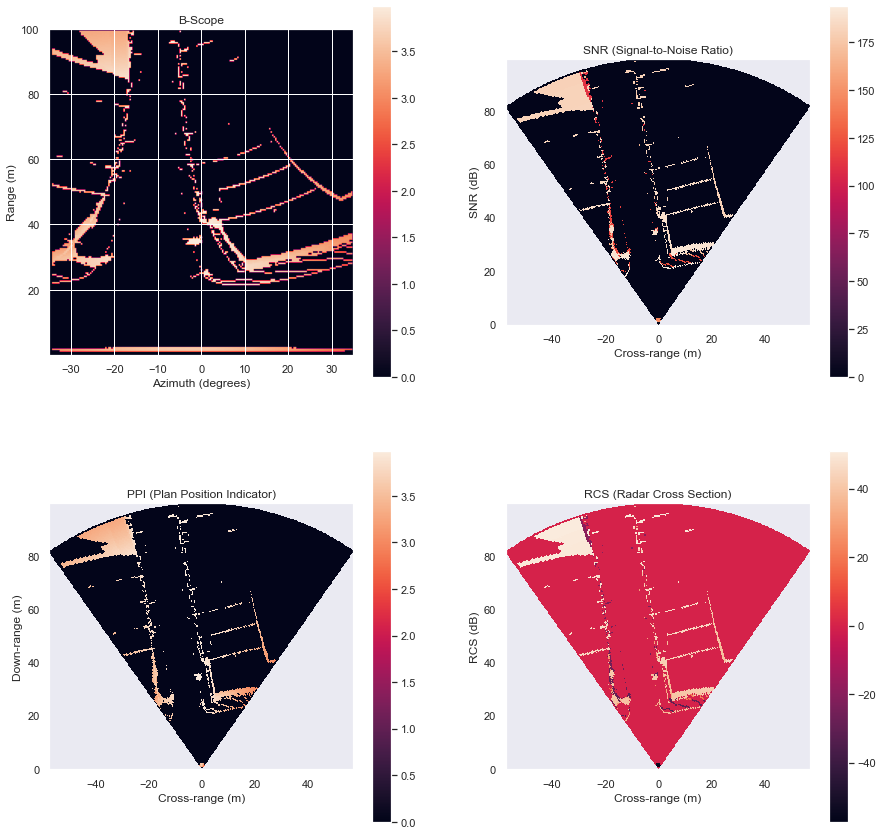

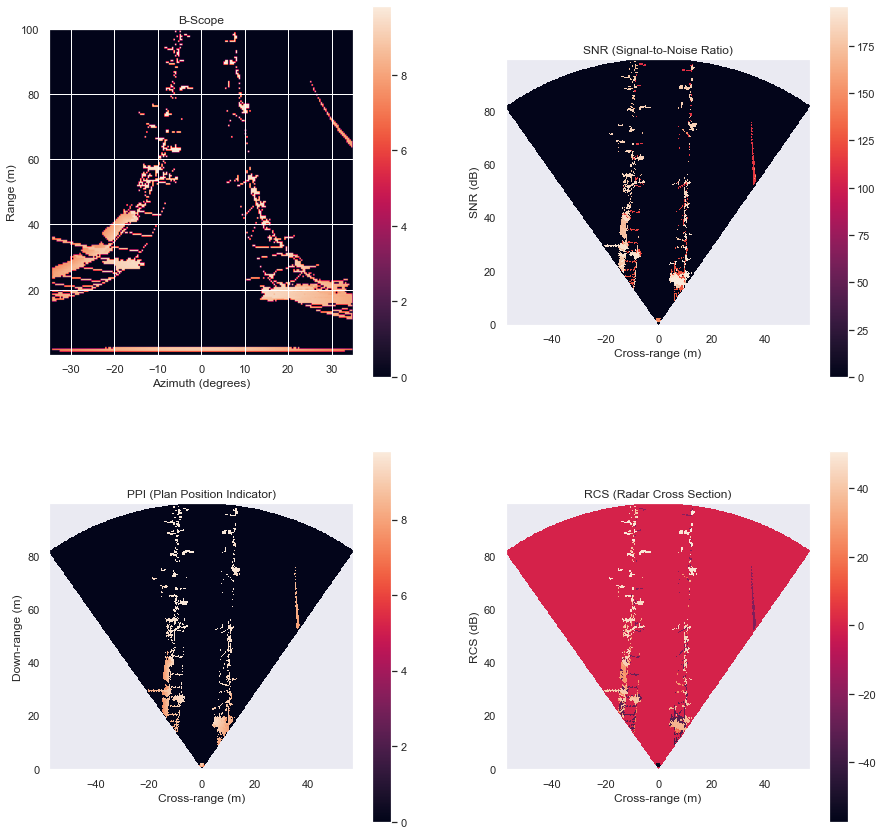

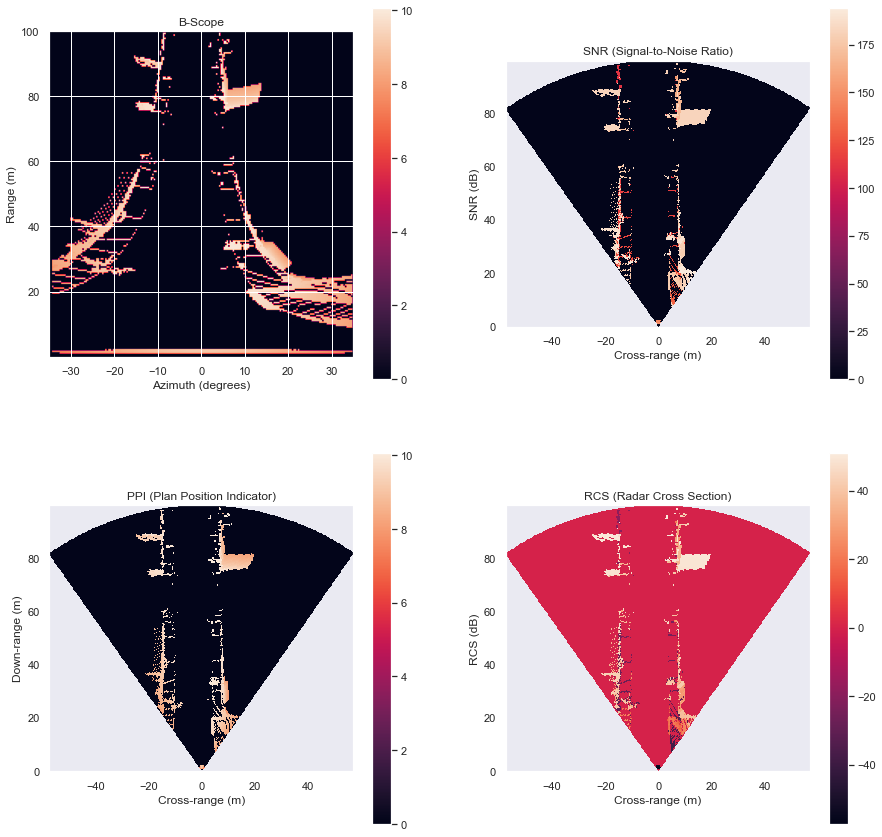

In [5]:
vehicle.ai.set_waypoint('junction1_wp24')
vehicle.ai.set_speed(10, mode='limit')
vehicle.ai.set_aggression(0.3)

for _ in range(3):
    sleep(5)
    readings_data = radar.poll()
    radar.plot_data(readings_data, RESOLUTION, FOV, RANGE_MIN, RANGE_MAX, 200, 200)

radar.remove()
beamng.close()